# **Zero to Mastery Learn PyTorch for Deep Learning**

Source:  

* https://www.youtube.com/watch?v=V_xro1bcAuA
* https://www.learnpytorch.io/00_pytorch_fundamentals/

## **PyTorch Fundamentals**

In [ ]:
# import library
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

2.1.0+cu121


In [ ]:
# nvidia system amangement interface, like shows the GPU specification
# this command will be executed when the runtime is set to use the GPU
!nvidia-smi

Wed Jan 17 12:54:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Introduction to tensors

Tensors are multidimensional data structures which can save the numerical data. In simple terms, tensors can be considered as a generalization of vectors and matrices. Tensors can have different dimensions (rank), including scalars (0D), vectors (1D), matrices (2D), and other multidimensional data structures (nD).


1. Scalars (0D Tensor): are tensors with 1 (one) element or called 0 dimension, usually are represented by a number, for example:

\begin{align}
        \mathbf{a} = 5
    \end{align}

\begin{align}
        \mathbf{b} = 10
    \end{align}

\begin{align}
        \mathbf{c} = 0.8
    \end{align}

2. Vectors (1D Tensor): are tensors with 1 dimension, represented as follows:

\begin{align}
  \mathbf{v} =
  \begin{bmatrix}
          1 \\
          2 \\
          3
  \end{bmatrix}
\end{align}

3. Matrices (2D Tensor): are tensors with 2 dimensions (rows and columns), represented as follows:

\begin{align}
A =
    \begin{bmatrix}
           1 & 2 & 3\\
           4 & 5 & 6\\
           7 & 8 & 9
    \end{bmatrix}
\end{align}

4. 3D Tensor: for example if you have a color image, that image can be represented as 3D Tensor, where first dimension is height, second dimension is width, and third dimension is color channel (RGB).

#### Creating tensors

In [ ]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
# checking scalar dimension
scalar.ndim

0

In [ ]:
# get the number within a tensor (only works with 0D tensor)
scalar.item()

7

In [ ]:
# vector
# vector represents magnitude and direction
vector = torch.tensor([8, 8])
vector

tensor([8, 8])

In [ ]:
# checking vector dimension
vector.ndim

1

In [ ]:
# vector shape
vector.shape

torch.Size([2])

In [ ]:
# matrix
MATRIX = torch.tensor([[7, 8],
                      [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
# checking matrix dimension
MATRIX.ndim

2

In [ ]:
# matrix shape
# that matrix shows that has 2 rows and 2 columns
MATRIX.shape

torch.Size([2, 2])

In [ ]:
# 3D tensor
# tensors can represent almost anything
TENSOR = torch.tensor([[[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]]])
TENSOR

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [ ]:
# checking tensor dimension
TENSOR.ndim

3

In [ ]:
# tensor shape
TENSOR.shape

torch.Size([1, 3, 3])

#### Getting information from tensors

In [ ]:
# create a tensor
some_tensor = torch.rand(3, 4)

# find out details about it
print(some_tensor)
print(f"Shape of tensor : {some_tensor.shape}")
print(f"Data type of tensor : {some_tensor.dtype}")
print(f"Device tensor is stored on : {some_tensor.device}")

tensor([[0.0628, 0.5926, 0.4190, 0.7031],
        [0.3323, 0.1843, 0.3521, 0.5562],
        [0.5728, 0.7333, 0.5731, 0.8020]])
Shape of tensor : torch.Size([3, 4])
Data type of tensor : torch.float32
Device tensor is stored on : cpu


> **Note**: When you run into issues in PyTorch, it's very often one to do with one of the three attributes above. So when the error messages show up, sing yourself a little song called "what, what, where":

* "what shape are my tensors? what datatype are they and where are they stored? what shape, what datatype, where where where"

#### Matrix multiplication (is all you need)

> You can do matrix multiplication by hand but it's not recommended. The in-built torch.matmul() method is faster.

In [ ]:
TENSOR = torch.tensor([1, 2, 3])

In [ ]:
%%time
# matrix multiplication by hand
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(TENSOR)):
  value += TENSOR[i] * TENSOR[i]
value

CPU times: user 912 µs, sys: 978 µs, total: 1.89 ms
Wall time: 8.18 ms


tensor(14)

In [ ]:
%%time
torch.matmul(TENSOR, TENSOR)

CPU times: user 518 µs, sys: 0 ns, total: 518 µs
Wall time: 7 ms


tensor(14)

In [ ]:
# shapes need to be in the right way
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (this will error)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [ ]:
# we have to match the inner dimension
# so we transpose the tensor_B
tensor_C = torch.mm(tensor_A, tensor_B.T)
tensor_C

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

In [ ]:
# since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# this uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input
                         out_features=6) # out_features = describes outer value
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


## **PyTorch Workflow**

1. Getting data ready
1. Building a model
1. Fitting the model to data (training)
1. Making predictions and evaluating a model (inference)
1. Saving and loading a model
1. Putting it all together

In [ ]:
# import dependencies
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.1.0+cu121'

### A. Data preparing and loading

Machine learning is a game of two parts:

1. Turn your data, whatever it is, into numbers (a representation).
1. Pick or build a model to learn the representation as best as possible.

In this section, we use dummy data created by ourselves and we use linear regression model.

In [ ]:
# create known parameters
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # making tensor 1D, then change to matrix 1 column
y = weight * X + bias # linear regression model

In [ ]:
X[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [ ]:
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [ ]:
# create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"X train = {len(X_train)}")
print(f"X test = {len(X_test)}")
print(f"y train = {len(y_train)}")
print(f"y test = {len(y_test)}")

X train = 40
X test = 10
y train = 40
y test = 10


In [ ]:
# create a function to visualize
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data, and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  if predictions is not None:
    # plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # show the legend
  plt.legend(prop={"size":14})

  # show the graph
  plt.show()

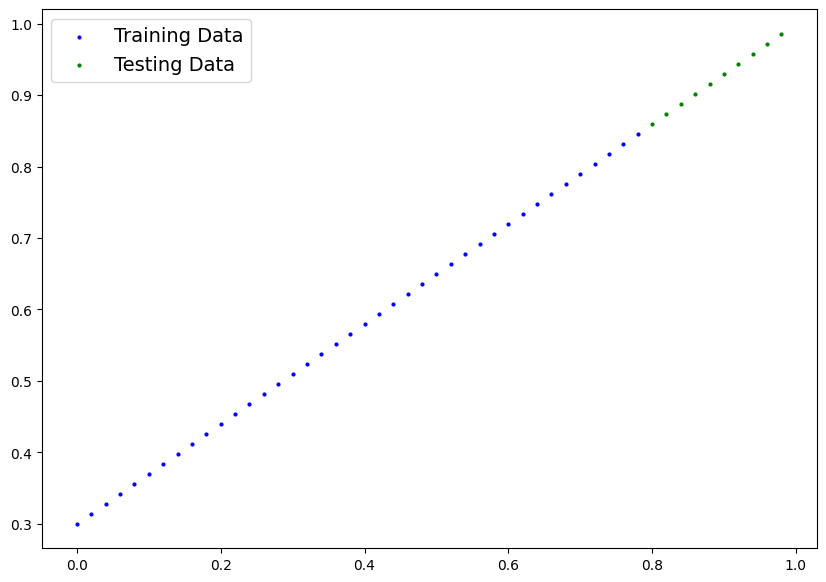

In [ ]:
plot_predictions()

### B. Build model

In [ ]:
# let's replicate a standard linear regression model using pure PyTorch
# create a linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in PyTorch is a nn.Module,  If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented
    def __init__(self):
        super().__init__()

        # initialize model parameters
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), # start with a float number (float32 by default) in 1D tensor can be - or + as a random weights (this will get adjusted as the model)
                                    requires_grad=True) # update the value with gradient descent
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    # fordward defines the computation in the model
    # this defines the forward computation of the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data (training/testing features)
        return self.weights * x + self.bias # this is the linear regression formula (y = m*x + b)

"""
Basic building blocks of creating a PyTorch model by subclassing nn.Module.
For objects that subclass nn.Module, the forward() method must be defined.
"""

'\nBasic building blocks of creating a PyTorch model by subclassing nn.Module.\nFor objects that subclass nn.Module, the forward() method must be defined.\n'

#### Checking the contents of a PyTorch model

* Now we've got these out of the way, let's create a model instance with the class we've made and check its parameters using .parameters().
* Because our model starts with random values, right now it'll have poor predictive power.

In [ ]:
# set manual_seed for generating random numbers, it will generate fix random numbers, if rerun the code it will not change
# if we don't use manual_seed, random numbers changing continuously
torch.manual_seed(42)

# create an instance of the model
model_0 = LinearRegressionModel()

# check the nn.Parameter within the nn.Module subclass we created
# the class that we created contains "weights" and "bias"
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# shows the parameters of class which already created (LinearRegressionModel class)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### Making predictions

In [ ]:
# make predictions with the model
# X_test replaces x in def forward() in LinearRegressionModel class
with torch.inference_mode():
  y_preds = model_0(X_test)

In [ ]:
# check the predictions
print("X_test = ")
print(X_test)
print(" ")
print("y_test = ")
print(y_test)
print(" ")
print("y_preds = ")
print(y_preds)

X_test = 
tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
 
y_test = 
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])
 
y_preds = 
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


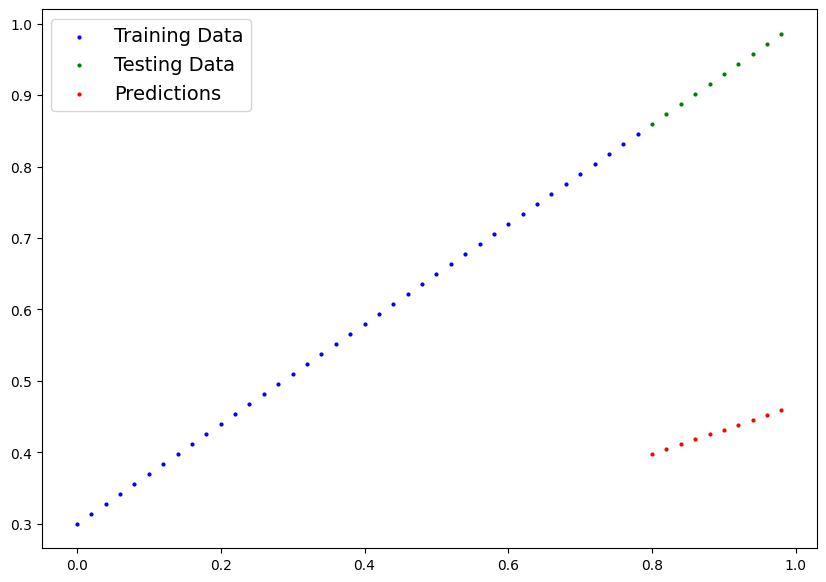

In [ ]:
# visualize the predictions
plot_predictions(predictions=y_preds)

> Those predictions look pretty bad. This make sense though when you remember our model is just using random parameter values to make predictions.

### C. Train model

#### Creating a loss function and optimizer

In [ ]:
# create the loss function
loss_func = nn.L1Loss() # we use Mean Absolute Error (MAE) because regression case, nn.L1Loss = MAE

# create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.001) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))
                                      # learning rate is how fast the parameters reach to optimal point of optimizer

#### Creating an optimization loop

In [ ]:
torch.manual_seed(42)

# set the number of epochs
epochs = 50

# create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### training, using X_train and y_train

    # put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. forward pass on train data using forward() method inside
    y_pred = model_0(X_train)

    # 2. calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_func(y_pred, y_train)

    # 3. zero grad of the optimizer
    optimizer.zero_grad()

    # 4. loss backwards, adjusting parameters / weight and bias
    loss.backward()

    # 5. progress the optimizer / optimizing parameters / learning process
    optimizer.step()

    ### testing, using X_test and y_test

    # put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
        # 1. forward pass on test data
        test_pred = model_0(X_test)

        # 2. calculate loss on test data
        test_loss = loss_func(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

        # 3. print the results
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.007870787754654884 | MAE Test Loss: 0.011371594853699207
Epoch: 10 | MAE Train Loss: 0.001258974545635283 | MAE Test Loss: 0.0029639541171491146
Epoch: 20 | MAE Train Loss: 0.0009092137333936989 | MAE Test Loss: 0.0020679414737969637
Epoch: 30 | MAE Train Loss: 0.0005659162998199463 | MAE Test Loss: 0.0012405574088916183
Epoch: 40 | MAE Train Loss: 0.00022584720863960683 | MAE Test Loss: 0.0005541443824768066


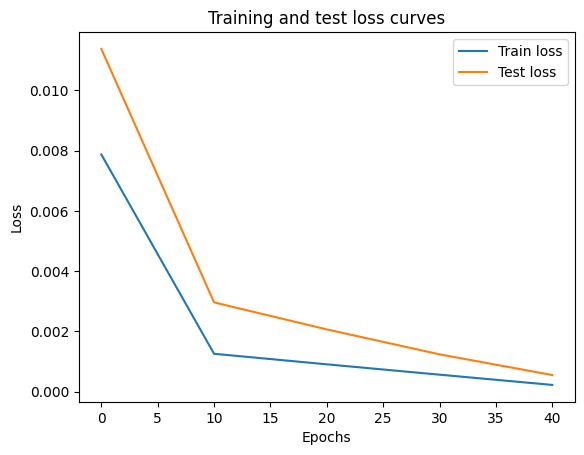

In [ ]:
# visualize training and testing result
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [ ]:
# let's inspect our model's .state_dict() to see see how close our model gets to the original values we set for weights and bias
# find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"Weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.3007]))])

And the original values for weights and bias are:
Weights: 0.7, bias: 0.3


> This is the whole idea of machine learning and deep learning, there are some ideal values that describe our data and rather than figuring them out by hand, we can train a model to figure them out programmatically.

### D. Making predictions

In [ ]:
# 1. set the model in evaluation mode
model_0.eval()

# 2. setup the inference mode contex manager
with torch.inference_mode():
    # 3. make sure the calculations are done with the model and data on the same device
    # in our case, we haven't setup device-agnostic code yet so our data and model are
    # on the CPU by default.
    # model_0.to(device)
    # X_test = X_test.to(device)
    y_preds = model_0(X_test)

print("y_preds\n")
print(y_preds)

y_preds

tensor([[0.8602],
        [0.8742],
        [0.8882],
        [0.9022],
        [0.9161],
        [0.9301],
        [0.9441],
        [0.9581],
        [0.9721],
        [0.9861]])


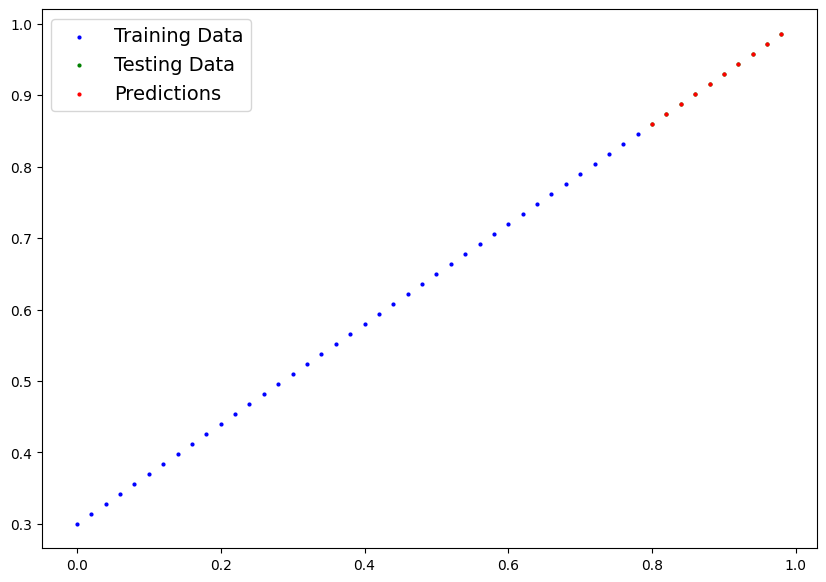

In [ ]:
# let's visualize the prediction of training test result
plot_predictions(predictions=y_preds)

### E. Saving and loading model

#### Saving model

In [ ]:
from pathlib import Path

# 1. create models directory
model_path = Path("/content/drive/MyDrive/Dataset/youtube_course_pytorch_tutorial")
model_path.mkdir(parents=True, exist_ok=True)

# 2. create model save path
model_name = "01_pytorch_workflow_model_simple.pth"
model_save_path = model_path / model_name

# 3. save the model state dict
print(f"Saving model to: {model_save_path}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=model_save_path)

Saving model to: /content/drive/MyDrive/Dataset/youtube_course_pytorch_tutorial/01_pytorch_workflow_model_simple.pth


In [ ]:
# check the saved file path
!ls -l /content/drive/MyDrive/Dataset/youtube_course_pytorch_tutorial/01_pytorch_workflow_model_simple.pth

-rw------- 1 root root 1710 Jan 19 14:13 /content/drive/MyDrive/Dataset/youtube_course_pytorch_tutorial/01_pytorch_workflow_model_simple.pth


#### Loading model

In [ ]:
# instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [ ]:
# 1. put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [ ]:
# compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## **PyTorch Neural Network Classification**

### **Make classification data and get it ready**

In [ ]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42)

In [ ]:
print(f"First 5 X features: \n{X[:5]}")
print(f"\nFirst 5 y labels: \n{y[:5]}")

First 5 X features: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels: 
[1 1 1 1 0]


In [ ]:
# make dataframe or circle data
import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:, 1],
                        "label" : y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
# check different labels
circles.label.value_counts()

# data is balance

1    500
0    500
Name: label, dtype: int64

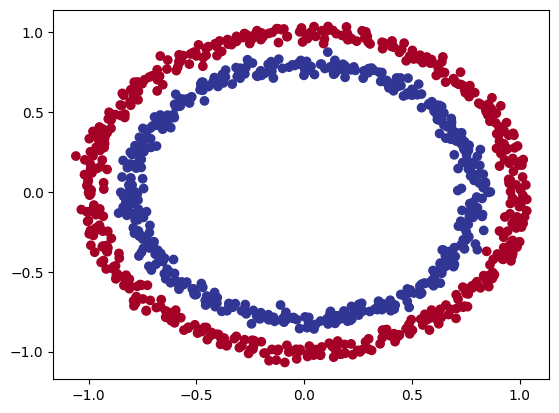

In [ ]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)
plt.show()

> Note: This dataset is often what's considered a toy problem (a problem that's used to try and test things out on) in machine learning. But it represents the major key of classification, you have some kind of data represented as numerical values and you'd like to build a model that's able to classify it, in our case, separate it into red or blue dots.

#### A. Input and output shapes

In [ ]:
# check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# view the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for 1 sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for 1 sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

# this tells us the second dimension for X means it has two features (vector) where as y has a single feature (scalar).
# we have two inputs for one output.

Values for 1 sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for 1 sample of X: (2,) and the same for y: ()


#### B. Turn data into tensors and create train and test splits

In [ ]:
# turn data into tensors, otherwise (if not) this causes issues with computations later on
import torch
X_tensor = torch.from_numpy(X).type(torch.float)
y_tensor = torch.from_numpy(y).type(torch.float)

# view the first five samples
print(X_tensor[:5])
print("\n", y_tensor[:5])

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

 tensor([1., 1., 1., 1., 0.])


In [ ]:
# split data into train and test sets
# before the data enters the model / computation, the data must be converted to tensor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

print(f"X train = {len(X_train)}")
print(f"y train = {len(y_train)}")
print(f"X test = {len(X_test)}")
print(f"y test = {len(y_test)}")

X train = 800
y train = 800
X test = 200
y test = 200


### **Building a model**

In [ ]:
# standar PyTorch imports
import torch
from torch import nn

# make device agnostic code
# this code is to set whether this deep learning model is run in GPU or CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#### A. Construct neural network model using nn.Module and nn.Sequential

In [ ]:
# 1. construct class of neural network model using nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. for this experiment, create 2 layers for handling X and y input and output shapes using nn.Linear
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (x1 and x2), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features (must be same from previous layer out_features, because that as input in this layer),
                                                                # produce 1 feature (y)
                                                                # in_features = 2 means the number of data feature (x1 and x2), always located in first layer
                                                                # in_features = 5 means the number of hidden neurons
                                                                # in features = 1 means the number of data label (only y), always located in last layer

    # 3. define a forward method containing the forward pass computation
    def forward(self, x):
        # return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first, then the output of layer_1 goes through the layer_2

# 4. create an instance of model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# replicate CirCleModelV0 with nn.Sequential
# for straight forward computation, using nn.Sequential is better
# but, if your computation is custom (not only straight forward), so using nn.Module is better
model_0_seq = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0_seq

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Lenght of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Lenght of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels: \n{y_test[:10]}")

# hmm, it seems there's the same amount of predictions as there is test labels,
# but the predictions don't look like they're in the same form or shape as the test labels (prediction shape is 2 dimensions, whereas test shape is 1 dimension)
# the result of predictions is not equal to test
# we've got a couple steps we can do to fix this, we'll see these later on.

Lenght of predictions: 200, Shape: torch.Size([200, 1])
Lenght of test samples: 200, Shape: torch.Size([200])

First 10 predictions: 
tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], grad_fn=<SliceBackward0>)

First 10 test labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


#### B. Setup loss function and optimizer

In [ ]:
# create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_func = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in
                                   # sigmoid is activation function that is usually used for binary classification

# create an optimizer
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.1
)

In [ ]:
# model evaluation using accuracy
def accuracy_func(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    accuracy = (correct / len(y_pred)) * 100
    return accuracy

### **Train model**

Steps in training:

1. Forward pass.
1. Calculate the loss.
1. Zero gradients.
1. Perform backpropagation on the loss.
1. Step the optimizer (gradient descent).

#### A. Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

We try to predict without training. The result is random value plus and minus. We use sigmoid activation function to produce 0 - 1 value. Sigmoid is often used in binary classification. And then, to make prediction value to be 0 and 1, so that is used round function.

In [ ]:
# view the firs 5 outputs of the forward pass on the test data
# without sigmoid, the output value will be plus and minus
# the output is not equal to true value, the true value only have 2 classes, 0 and 1
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], grad_fn=<SliceBackward0>)

In [ ]:
# use sigmoid on model logits
# the output value will be 0 - 1
y_pred_probs = torch.sigmoid(model_0(X_test.to(device))[:5])
y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], grad_fn=<SigmoidBackward0>)

In [ ]:
# find the predicted labels, use round function so the output will be 0 and 1 (same as the output label)
y_pred_labels = torch.round(y_pred_probs)

# check for value equality
print(torch.eq(y_pred_probs.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension
print("y prediction: \n", y_pred_labels.squeeze())

# compare with true value
print("\ny true: \n", y_test[:5])

tensor([False, False, False, False, False])
y prediction: 
 tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)

y true: 
 tensor([1., 0., 1., 0., 1.])


#### B. Building a training and testing loop

In [ ]:
# to make the result consistent
torch.manual_seed(42)

# set the number of epochs
epochs = 100

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# build training and evaluation loop
for epoch in range(epochs):
    ### training
    model_0.train()

    # 1. forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze is to remove extra '1' dimensions, this won't work unless model and data are on same device
    y_preds = torch.round(torch.sigmoid(y_logits)) # turn logits (random value + and -) -> pred probabilistics (range output 0 - 1) -> pred labels (output to be 0 and 1)

    # 2. calculate loss and accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # when using nn.BCELoss, we need torch.sigmoid()
    #                y_train)
    loss = loss_func(y_logits, y_train) # we use nn.BCEWithLogitsLoss works with raw logits
    acc = accuracy_func(y_true=y_train, y_pred=y_preds)

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backwards
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    ### testing
    model_0.eval()
    with torch.inference_mode():
        # 1. forward pass
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        # 2. calculate loss and accuracy
        test_loss = loss_func(test_logits, y_test)
        test_acc = accuracy_func(y_true=y_test, y_pred=test_preds)

    # print out what is happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69569, Accuracy: 50.00% | Test Loss: 0.69721, Test Accuracy: 50.00%
Epoch: 10 | Loss: 0.69403, Accuracy: 50.00% | Test Loss: 0.69615, Test Accuracy: 50.00%
Epoch: 20 | Loss: 0.69343, Accuracy: 46.00% | Test Loss: 0.69585, Test Accuracy: 48.50%
Epoch: 30 | Loss: 0.69321, Accuracy: 49.00% | Test Loss: 0.69577, Test Accuracy: 47.50%
Epoch: 40 | Loss: 0.69312, Accuracy: 49.50% | Test Loss: 0.69573, Test Accuracy: 46.50%
Epoch: 50 | Loss: 0.69308, Accuracy: 50.38% | Test Loss: 0.69569, Test Accuracy: 46.50%
Epoch: 60 | Loss: 0.69306, Accuracy: 50.50% | Test Loss: 0.69564, Test Accuracy: 46.50%
Epoch: 70 | Loss: 0.69305, Accuracy: 50.50% | Test Loss: 0.69559, Test Accuracy: 46.50%
Epoch: 80 | Loss: 0.69304, Accuracy: 50.75% | Test Loss: 0.69553, Test Accuracy: 46.50%
Epoch: 90 | Loss: 0.69303, Accuracy: 50.38% | Test Loss: 0.69547, Test Accuracy: 46.50%


The accuracy barely moves above 50% on each data split. And because we're working with a balanced binary classification problem, it means our model is performing as good as random guessing (with 500 samples of class 0 and class 1 a model predicting class 1 every single time would achieve 50% accuracy).

### **Make predictions and evaluate the model**

In [ ]:
import requests
from pathlib import Path

# download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download


In [ ]:
from helper_functions import plot_predictions, plot_decision_boundary

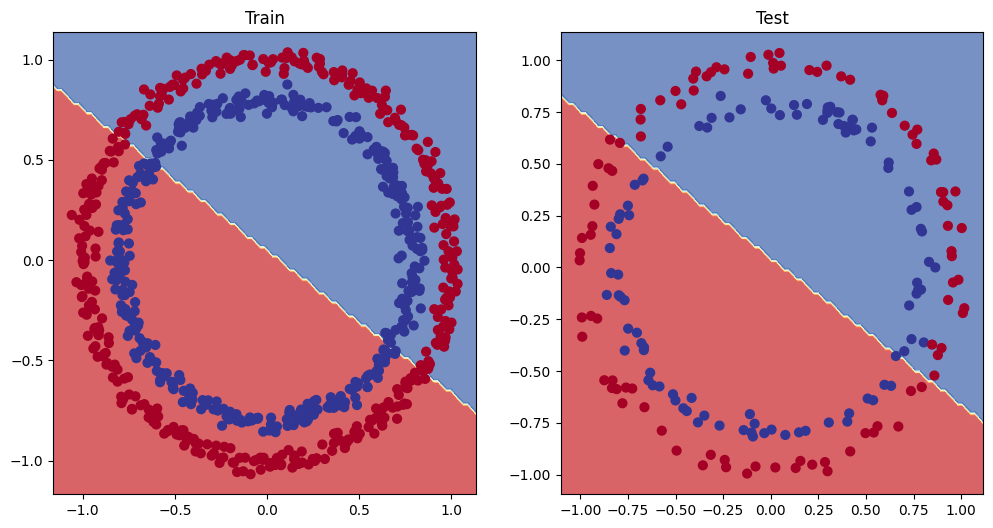

In [ ]:
# plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train) # train result
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test) # test result
plt.show()

### **Improving a model with activation function**

1. Add more layers
1. Add more hidden units
1. Fitting for longer (more epochs)
1. Changing the activation functions
1. Change the learning rate
1. Change the loss function
1. Use transfer learning

#### A. Recreating non-linear data (red and blue circles)

In [ ]:
# import libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

import torch
from torch import nn

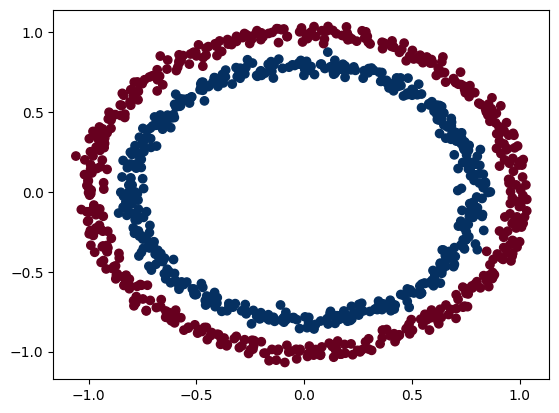

In [ ]:
# load the data
n_samples = 1000
X, y = make_circles(
    n_samples=n_samples,
    noise=0.03,
    random_state=42
)

# visualize the data
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.show()

In [ ]:
# convert the data to tensor and split into train and test sets

# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X train = \n", X_train[:5])
print("\ny train = \n", y_train[:5])

X train = 
 tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

y train = 
 tensor([1., 0., 0., 0., 1.])


In [ ]:
# number of train and test data
print(f"Number of X train = {len(X_train)}")
print(f"Number of y train = {len(y_train)}")
print(f"Number of X test = {len(X_test)}")
print(f"Number of y test = {len(y_test)}")

Number of X train = 800
Number of y train = 800
Number of X test = 200
Number of y test = 200


#### B. Building a model with non-linearity

In [ ]:
# build model with non-linear activation function (using ReLU)
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=16)
        self.layer_2 = nn.Linear(in_features=16, out_features=16)
        self.layer_3 = nn.Linear(in_features=16, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # can also put sigmoid in the model
        # this would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.layer_1(x))))

model_1 = CircleModelV1().to(device)
print(model_1)

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


> Question: Where should I put the non-linear activation functions when constructing a neural network?

> A rule of thumb is to put them in between hidden layers and just after the output layer, however, there is no set in stone option. As you learn more about neural networks and deep learning you'll find a bunch of different ways of putting things together. In the meantine, best to experiment, experiment, experiment.

In [ ]:
# setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [ ]:
# model evaluation using accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    accuracy = (correct / len(y_pred)) * 100
    return accuracy

#### C.Training a model with non-linearity

In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 75000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epoch_count = []
train_loss_vl = []
test_loss_vl = []
train_acc_vl = []
test_acc_vl = []

for epoch in range(epochs):
    ### training
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()

    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 500 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")
        epoch_count.append(epoch)
        train_loss_vl.append(loss.detach().numpy())
        test_loss_vl.append(test_loss.detach().numpy())
        train_acc_vl.append(acc)
        test_acc_vl.append(test_acc)

Epoch: 0 | Loss: 0.69936, Accuracy: 50.00% | Test Loss: 0.69765, Test Accuracy: 50.00%
Epoch: 500 | Loss: 0.63495, Accuracy: 79.62% | Test Loss: 0.64132, Test Accuracy: 76.00%
Epoch: 1000 | Loss: 0.42502, Accuracy: 99.50% | Test Loss: 0.45989, Test Accuracy: 98.00%
Epoch: 1500 | Loss: 0.19944, Accuracy: 99.88% | Test Loss: 0.24259, Test Accuracy: 99.50%
Epoch: 2000 | Loss: 0.09935, Accuracy: 100.00% | Test Loss: 0.14091, Test Accuracy: 100.00%
Epoch: 2500 | Loss: 0.06171, Accuracy: 99.88% | Test Loss: 0.09569, Test Accuracy: 99.50%
Epoch: 3000 | Loss: 0.04306, Accuracy: 99.88% | Test Loss: 0.07055, Test Accuracy: 99.50%
Epoch: 3500 | Loss: 0.03302, Accuracy: 100.00% | Test Loss: 0.05855, Test Accuracy: 99.50%
Epoch: 4000 | Loss: 0.02600, Accuracy: 100.00% | Test Loss: 0.05109, Test Accuracy: 99.00%
Epoch: 4500 | Loss: 0.02109, Accuracy: 100.00% | Test Loss: 0.04863, Test Accuracy: 99.00%
Epoch: 5000 | Loss: 0.01799, Accuracy: 100.00% | Test Loss: 0.04393, Test Accuracy: 99.00%
Epoch: 5

#### D. Evaluating a model trained with non-linear activation functions

In [ ]:
# make predictions
model_1.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_1(X_test))).squeeze()

y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

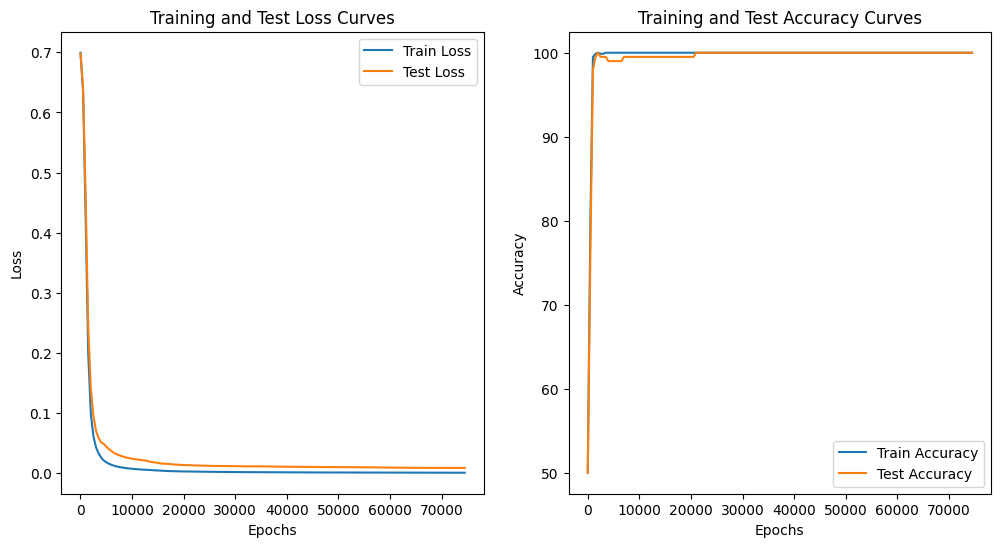

In [ ]:
# visualize training and testing result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_count, train_loss_vl, label="Train Loss")
plt.plot(epoch_count, test_loss_vl, label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epoch_count, train_acc_vl, label="Train Accuracy")
plt.plot(epoch_count, test_acc_vl, label="Test Accuracy")
plt.title("Training and Test Accuracy Curves")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

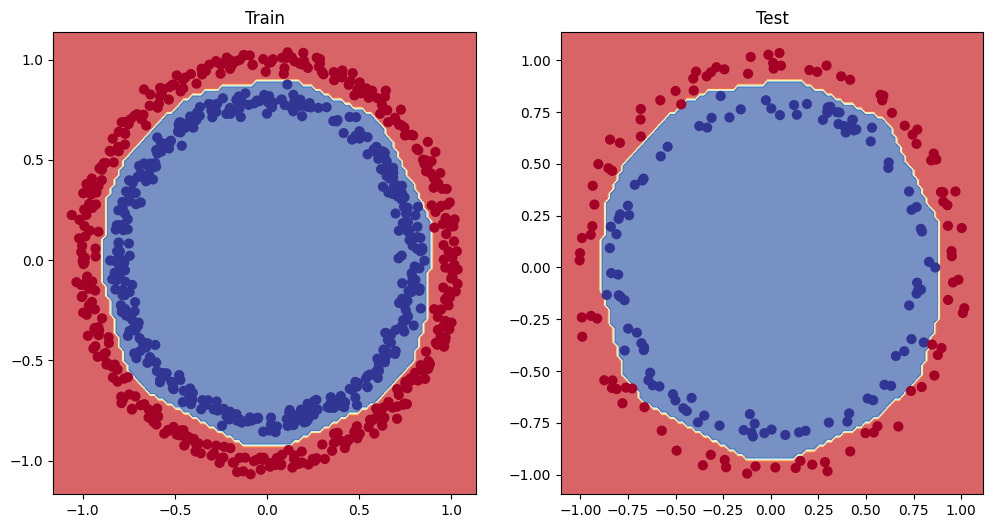

In [ ]:
# plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### **Putting things together by building a multi-class PyTorch model**

#### A. Creating mutli-class classification data

1. Create some multi-class data with make_blobs().
1. Turn the data into tensors (the default of make_blobs() is to use NumPy arrays).
1. Split the data into training and test sets using train_test_split().
1. Visualize the data.

In [1]:
# import dependencies
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import torch
from torch import nn

X blob: 
 tensor([[ 5.1463,  1.3554],
        [-5.9865,  7.2325],
        [-2.2106,  8.1140],
        [-5.5022, -9.2359],
        [-5.9605, -8.4602],
        [-5.0600, -6.6675],
        [-3.6841,  8.5312],
        [-1.6886,  8.7110],
        [-1.0465,  8.7937],
        [ 5.1303,  1.6445]])

y blob: 
 tensor([1, 3, 0, 2, 2, 2, 0, 0, 0, 1])



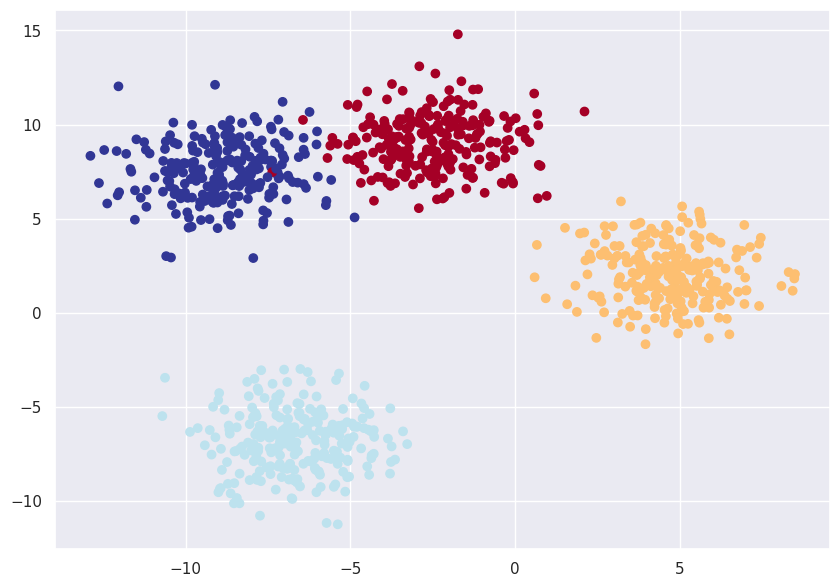

In [42]:
# set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print("X blob: \n", X_blob[10:20])
print("\ny blob: \n", y_blob[10:20])
print("")

# 3. split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)
plt.show()

#### B. Building a multi-class classification model in PyTorch

In [3]:
# create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [20]:
# build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int) : Number of input features to the model.
            out_features (int)   : Number of output features of the model
                                   (how many classes there are).
            hidden_units (int)   : Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# create an instance of BlobModel and send it to the target device
model_blob = BlobModel(input_features=NUM_FEATURES, output_features=NUM_CLASSES, hidden_units=8).to(device)
model_blob

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

#### C. Creating a loss function and optimizer for a multi-class PyTorch model

In [21]:
# create loss and optimizer
loss_fn = nn.CrossEntropyLoss() # for multi-class slassification
optimizer = torch.optim.SGD(model_blob.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [22]:
# model evaluation using accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    accuracy = (correct / len(y_pred)) * 100
    return accuracy

#### D. Getting prediction probabilities for a multi-class PyTorch model

> Alright, we've got a loss function and optimizer ready, and we're ready to train our model but before we do let's do a single forward pass with our model to see if it works.

In [23]:
# perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_blob(X_blob_train.to(device))[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], grad_fn=<SliceBackward0>)

In [24]:
# how many elements in a single prediction sample?
model_blob(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

In [25]:
# make prediction logits with model
y_logits = model_blob(X_blob_test.to(device))

# perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print("y logits = \n", y_logits[:5])
print("\ny prediction probability = \n", y_pred_probs[:5])

y logits = 
 tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], grad_fn=<SliceBackward0>)

y prediction probability = 
 tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], grad_fn=<SliceBackward0>)


In [26]:
# sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[5])

tensor(1., grad_fn=<SumBackward0>)

> Since there's one value for each class in y_pred_probs, the index of the highest value is the class the model thinks the specific data sample most belongs to. We can check which index has the highest value using torch.argmax().

In [27]:
# which class does the model think is *most* likely at the index 5 sample?
print("The value of each class in y prediction probability at index 5 = \n", y_pred_probs[5])
print("\nClass determination is shown on the highest value of the sample, so this sample is in the index class to = \n", torch.argmax(y_pred_probs[5]))

The value of each class in y prediction probability at index 5 = 
 tensor([0.2788, 0.0088, 0.2893, 0.4232], grad_fn=<SelectBackward0>)

Class determination is shown on the highest value of the sample, so this sample is in the index class to = 
 tensor(3)


> Note:
1. To summarize the above, a model's raw output is referred to as logits.
2. For a multi-class classification problem, to turn the logits into prediction probabilities, you use the softmax activation function (torch.softmax).
3. The index of the value with the highest prediction probability is the class number the model thinks is most likely given the input features for that sample (although this is a prediction, it doesn't mean it will be correct).

#### E. Creating a training and testing loop for a multi-class PyTorch model

In [35]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

epoch_count = []
train_loss_vl = []
test_loss_vl = []
train_acc_vl = []
test_acc_vl = []

for epoch in range(epochs):
    ### Training
    model_blob.train()

    # 1. Forward pass
    y_logits = model_blob(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_blob.eval()

    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_blob(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    #if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")
    epoch_count.append(epoch)
    train_loss_vl.append(loss.detach().numpy())
    test_loss_vl.append(test_loss.detach().numpy())
    train_acc_vl.append(acc)
    test_acc_vl.append(test_acc)

Epoch: 0 | Loss: 0.02325, Acc: 99.25% | Test Loss: 0.01160, Test Acc: 99.50%
Epoch: 1 | Loss: 0.02325, Acc: 99.25% | Test Loss: 0.01160, Test Acc: 99.50%
Epoch: 2 | Loss: 0.02324, Acc: 99.25% | Test Loss: 0.01159, Test Acc: 99.50%
Epoch: 3 | Loss: 0.02324, Acc: 99.25% | Test Loss: 0.01159, Test Acc: 99.50%
Epoch: 4 | Loss: 0.02324, Acc: 99.25% | Test Loss: 0.01159, Test Acc: 99.50%
Epoch: 5 | Loss: 0.02324, Acc: 99.25% | Test Loss: 0.01158, Test Acc: 99.50%
Epoch: 6 | Loss: 0.02323, Acc: 99.25% | Test Loss: 0.01158, Test Acc: 99.50%
Epoch: 7 | Loss: 0.02323, Acc: 99.25% | Test Loss: 0.01158, Test Acc: 99.50%
Epoch: 8 | Loss: 0.02323, Acc: 99.25% | Test Loss: 0.01158, Test Acc: 99.50%
Epoch: 9 | Loss: 0.02323, Acc: 99.25% | Test Loss: 0.01157, Test Acc: 99.50%
Epoch: 10 | Loss: 0.02323, Acc: 99.25% | Test Loss: 0.01157, Test Acc: 99.50%
Epoch: 11 | Loss: 0.02322, Acc: 99.25% | Test Loss: 0.01157, Test Acc: 99.50%
Epoch: 12 | Loss: 0.02322, Acc: 99.25% | Test Loss: 0.01157, Test Acc: 99.

#### F. Making and evaluating predictions with a PyTorch multi-class model

In [36]:
# make predictions
model_blob.eval()
with torch.inference_mode():
    y_logits = model_blob(X_blob_test)

# view the first 10 predictions
y_logits[:10]

tensor([[  6.1117,  18.9106, -22.9633, -14.6996],
        [  9.5663, -23.8503,   5.8413,  17.7027],
        [ -8.4024, -21.8531,  30.5468,  17.0858],
        [  2.1340,  14.6655, -13.7829, -11.2653],
        [ 13.2141,   3.9343, -21.4953,  -3.6479],
        [ 10.8393, -29.6209,   8.5482,  22.0347],
        [ -9.3843, -15.7081,  27.1176,  12.4539],
        [ 11.9276,  -3.3287, -13.8623,   1.9500],
        [ -7.8685, -31.8188,  37.6566,  24.6510],
        [ 12.1832,  -0.6223, -16.3793,  -0.1247]])

In [37]:
# turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: \n{y_preds[:10]}\nLabels: \n{y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: 
tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: 
tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


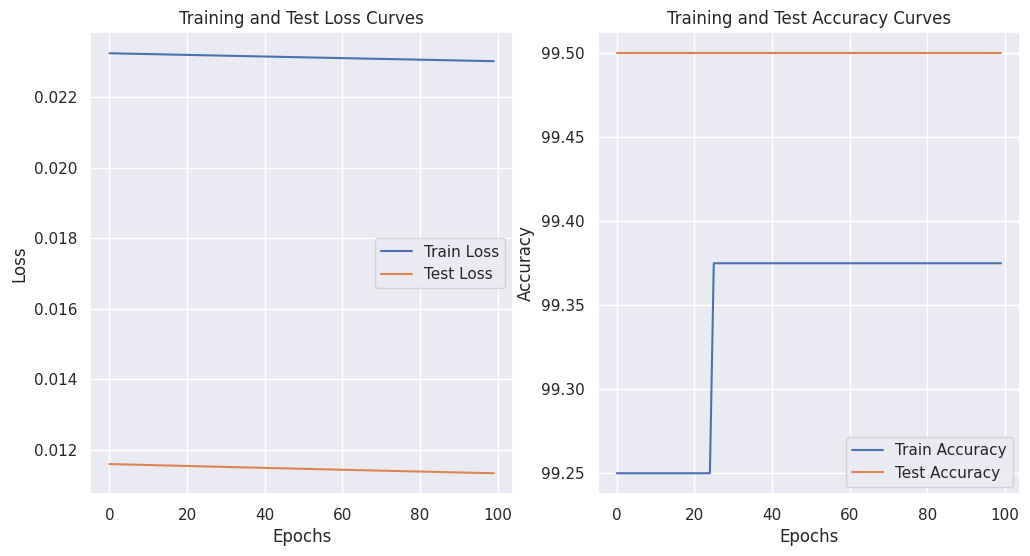

In [38]:
# visualize training and testing result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_count, train_loss_vl, label="Train Loss")
plt.plot(epoch_count, test_loss_vl, label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epoch_count, train_acc_vl, label="Train Accuracy")
plt.plot(epoch_count, test_acc_vl, label="Test Accuracy")
plt.title("Training and Test Accuracy Curves")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

> Let's visualize them with plot_decision_boundary(), remember because our data is on the GPU, we'll have to move it to the CPU for use with matplotlib (plot_decision_boundary() does this automatically for us).

In [39]:
# visualize the classification

import requests
from pathlib import Path

# download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

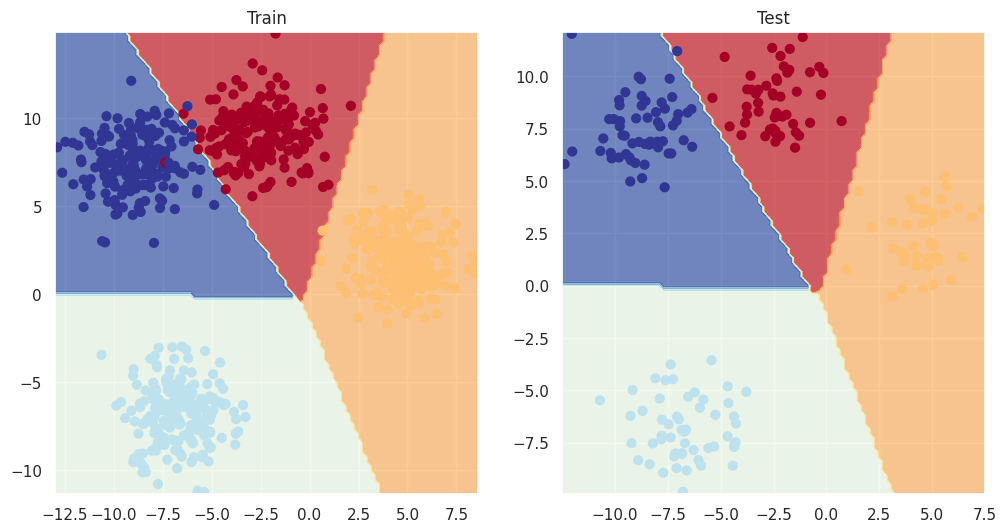

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_blob, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_blob, X_blob_test, y_blob_test)

In [43]:
# show the classification metric
from sklearn.metrics import classification_report
y_true = y_blob_test
y_pred = y_preds
target_names = ["Class 0", "Class 1", "Class 2", "Class 3"]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99        49
     Class 1       1.00      1.00      1.00        41
     Class 2       1.00      1.00      1.00        53
     Class 3       1.00      0.98      0.99        57

    accuracy                           0.99       200
   macro avg       0.99      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



___